<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/2021/%EC%9D%B4%EA%B0%80%EC%9D%80/211008%5B%EA%B3%BC%EC%A0%9C%5D_%EC%98%81%EC%83%81%EC%B2%98%EB%A6%AC_%ED%9D%89%EB%B6%80x_ray%EC%97%90%EC%84%9C_roi%EB%A5%BC_%EB%A7%88%EC%8A%A4%ED%81%AC%EB%A1%9C_%EC%9E%98%EB%9D%BC%EB%82%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV

*  cv2.IMREAD_COLOR : 별도로 지정하지 않을 경우 사용되는 기본값이며 칼라 이미지로 읽어드림. 이미지의 투명도값은 무시된다.
* cv2.IMREAD_GRAYSCALE : 이미지를 Grayscale로 읽는다
* cv2.IMREAD_UNCHANGED : 투명도인 Alpha 채널을 포함하여 읽는다.

---


* #### openCV는 BGR로 사용하지만, Matplotlib는 RGB로 이미지를 보여주기 때문입니다.
* 즉 결과 값은 3차원 배열의 값중 첫번째와 세번째 배열값을 서로 바꿔 주여야 합니다.



# 영상처리
## github의 흉부 x-ray사진에서 roi를 마스크로 잘라내는 처리 수행하는 프로그램 작성하여 
## 소스 및 보고서 제출.
 * 사진을 원하는 모양을 잡아 그 부분만 segmentation 해보자.
 * 사진을 이진화시킨 후, 경계면을 다듬어 마스크를 만들어 낸 후, 이를 사진에 다시 적용시켜 그 부위를 오려내고자 한다.

### VER_1 )

In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [5]:
# 1. 그림 불러오기
path = '/content/drive/MyDrive/가은/2021/영상처리/images'
fstr_0 = os.path.join(path,'Lung.jpg')
fstr_1 = os.path.join(path,'Lung_mask.png')

# 2. 그림 gray 로 읽기
img  = cv2.imread(fstr_0,cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(fstr_1,cv2.IMREAD_GRAYSCALE) 

(279, 283)
(279, 283)


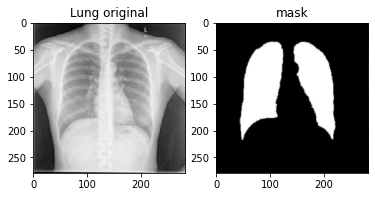

In [8]:
# 3. Lung 와 mask
plt.figure()
plt.subplot(121), plt.imshow(img,cmap=plt.cm.gray), plt.title("Lung original")
plt.subplot(122), plt.imshow(mask,cmap=plt.cm.gray), plt.title("mask")

print(img.shape)
print(mask.shape) # img 와 mask shape 같아야 함

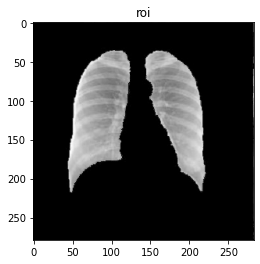

In [9]:
# 4. Mask의 roi 지정
masked_roi = cv2.bitwise_and(img,mask)    # and.. 둘다 1 

plt.figure(), plt.title("roi"), plt.imshow(masked_roi,cmap=plt.cm.gray)
plt.show()

### VER_2 )


#### cv2.imread()
*   이미지 파일을 읽습니다. 이미지 파일의 경로는 절대/상대경로가 가능합니다.


In [10]:
# 1. 그림 불러오기
fstr_0 = os.path.join(path,'Lung.jpg')

# 2. 그림 gray 로 읽기
img  = cv2.imread(fstr_0,cv2.IMREAD_GRAYSCALE)

#### cv2.imshow()
*  이미지를 사이즈에 맞게 보여줍니다.

(<matplotlib.image.AxesImage at 0x7ff696c4cb50>,
 Text(0.5, 1.0, 'Lung original'))

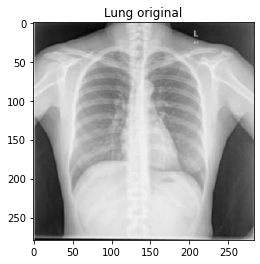

In [11]:
plt.imshow(img,cmap=plt.cm.gray), plt.title("Lung original")

#### cv2.threshold
* _, mask = cv2.threshold(원본이미지, 임계값, 임계값 이상일 경우 바꿀 최대값(보통 흰색 255 지정), THRESH_BINARY(픽셀값이 임계값보다 클 경우 최대값, 최대값이 임계값보다 작을 경우 0(검은색) 이진화)

In [12]:
_, mask = cv2.threshold(mask,254,255,cv2.THRESH_BINARY)

#### mask
*   마스크 영상은 픽셀 값이 0이 아닌 위치에서만 연산이 수행됨
*   보통 마스크 영상으로는 0 또는 255로 구성된 이진 영상을 사용



(<matplotlib.image.AxesImage at 0x7ff696bc23d0>, Text(0.5, 1.0, 'mask'))

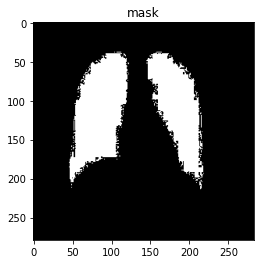

In [13]:
 plt.imshow(mask,cmap=plt.cm.gray), plt.title("mask")

In [14]:
mask = (mask*1).astype('uint8') # cv2의 기본 데이터타입은 'uint8'이므로 바꿔준다.

In [15]:
masked = cv2.bitwise_or(img,mask)     # 0 이나 1
masked1 = cv2.bitwise_and(img,mask)   # 1 만

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff696bc29d0>,
 Text(0.5, 1.0, 'masked-gray'))

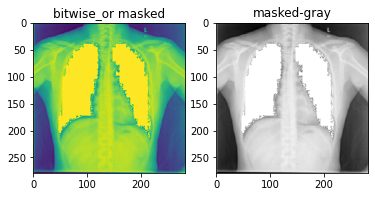

In [16]:
plt.subplot(121), plt.imshow(masked), plt.title("bitwise_or masked")
plt.subplot(122), plt.imshow(masked, cmap='gray') ,  plt.title("masked-gray")

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff696afa150>,
 Text(0.5, 1.0, 'masked1-gray'))

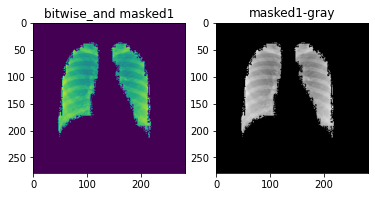

In [17]:
plt.subplot(121), plt.imshow(masked1), plt.title("bitwise_and masked1")
plt.subplot(122), plt.imshow(masked1, cmap='gray') ,  plt.title("masked1-gray")